##### 辨識 QRCode 和 BarCode
這篇教學會使用 OpenCV 讀取包含 QRCode ( 二維條碼 ) 和 BarCdoe ( 條碼 ) 的影像，搭配 QRCodeDetector() 和 barcode_BarcodeDetector() 方法，\
實現在攝影機影像中即時辨識 QRCode 和 BarCode 的功能。

因為程式中的 OpenCV 會需要使用鏡頭或 GPU，所以請使用本機環境或使用 Anaconda Jupyter 進行實作，\
並安裝 OpenCV 函式庫 ( 參考：[OpenCV 函式庫](https://steam.oxxostudio.tw/category/python/ai/opencv.html) )。

##### 辨識 QRCode 
OpenCV 開啟圖片後，使用 QRCodeDetector() 建立 QRCode 偵測器，接著就能使用 detectAndDecode() 方法開始偵測圖片中的 QRCode，\
偵測 QRCode 之後會回傳三個數值：

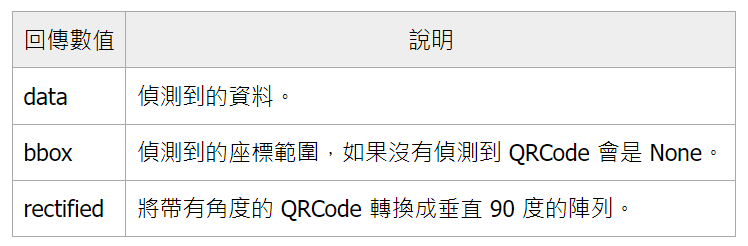

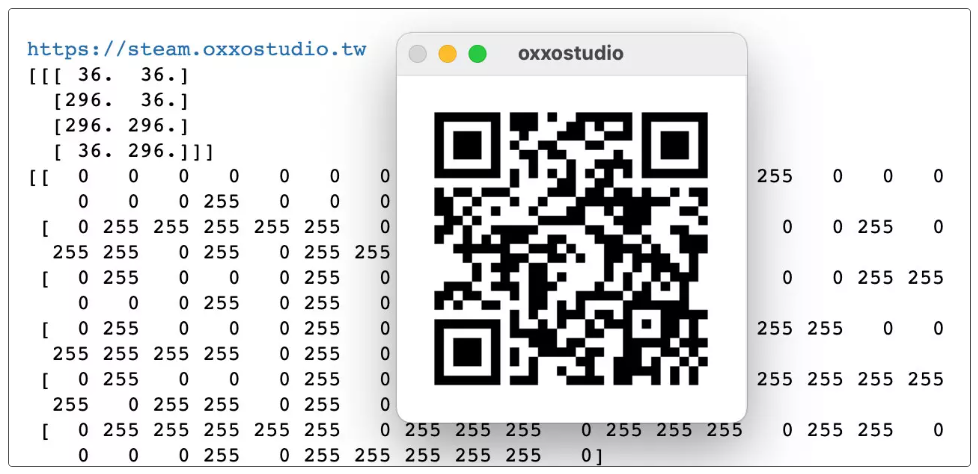

In [ ]:
import cv2
import numpy as np

img = cv2.imread("QRcode.png")                       # 開啟圖片

qrcode = cv2.QRCodeDetector()                        # 建立 QRCode 偵測器
data, bbox, rectified = qrcode.detectAndDecode(img)  # 偵測圖片中的 QRCode
# 如果 bbox 是 None 表示圖片中沒有 QRCode
if bbox is not None:
    print(data)                # QRCode 的內容
    print(bbox)                # QRCode 的邊界
    print(rectified)           # 換成垂直 90 度的陣列

cv2.imshow('oxxostudio', img)  # 預覽圖片
cv2.waitKey(0)                 # 按下任意鍵停止
cv2.destroyAllWindows()        # 結束所有圖片視窗

因為 bbox 的內容為 QRCode 邊界四個點的座標，所以可以建立一個簡單的函式，取出左上和右下的座標，透過座標標記出 QRCode 的外框，下方的程式碼執行後，會在偵測到的 QRCode 邊緣標記出紅色外框。

* 參考：[rectangle() 畫四邊形](https://steam.oxxostudio.tw/category/python/ai/opencv-drawing.html#a3)、[numpy.rollaxis()](https://steam.oxxostudio.tw/category/python/numpy/array-shape.html#a4)、[極值](https://steam.oxxostudio.tw/category/python/numpy/numpy-math.html#a4)

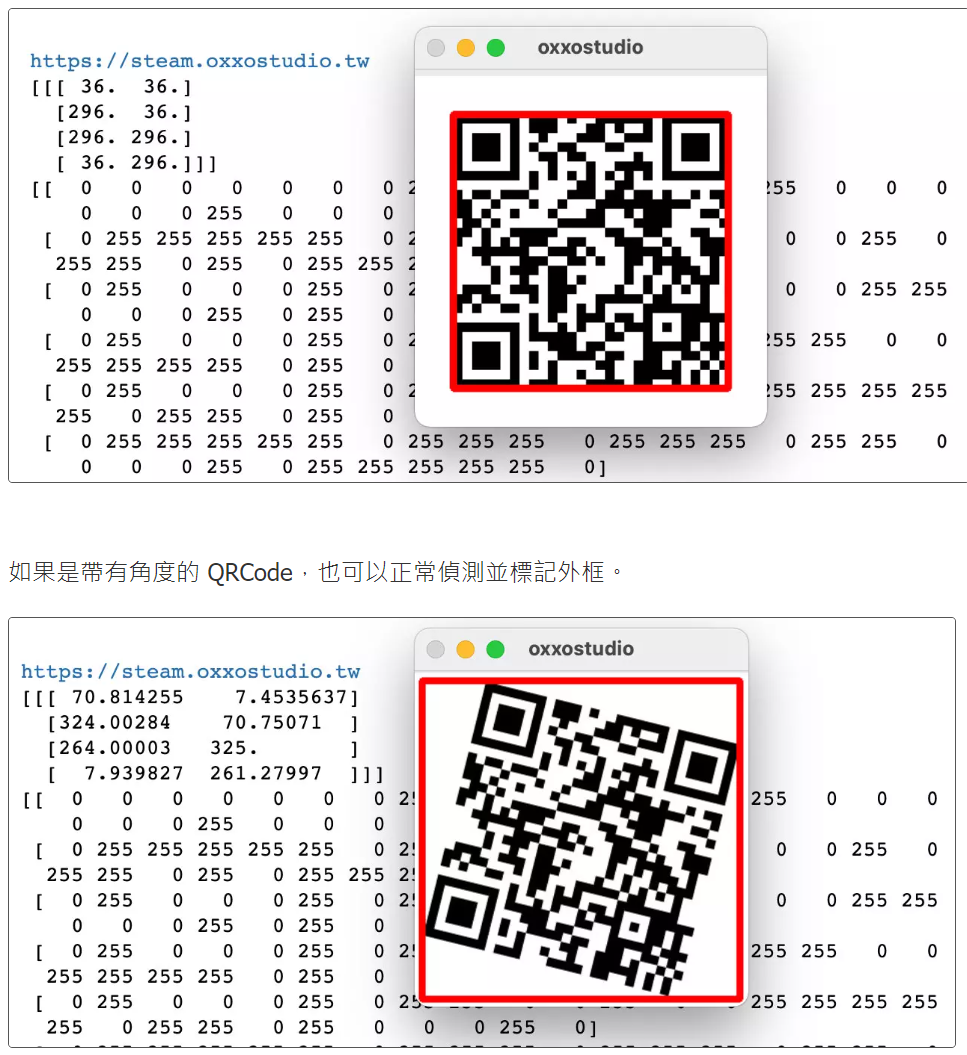

In [ ]:
import cv2
import numpy as np
img = cv2.imread("QRcode.png")

qrcode = cv2.QRCodeDetector()                       # 建立 QRCode 偵測器
data, bbox, rectified = qrcode.detectAndDecode(img) # 偵測圖片中的 QRCode

# 取得座標的函式
def boxSize(arr):
    global data
    box_roll = np.rollaxis(arr,1,0)   # 轉置矩陣，把 x 放在同一欄，y 放在同一欄
    xmax = int(np.amax(box_roll[0]))  # 取出 x 最大值
    xmin = int(np.amin(box_roll[0]))  # 取出 x 最小值
    ymax = int(np.amax(box_roll[1]))  # 取出 y 最大值
    ymin = int(np.amin(box_roll[1]))  # 取出 y 最小值
    return (xmin,ymin,xmax,ymax)

# 如果 bbox 是 None 表示圖片中沒有 QRCode
if bbox is not None:
    print(data)
    print(bbox)
    print(rectified)
    box = boxSize(bbox[0])
    cv2.rectangle(img,(box[0],box[1]),(box[2],box[3]),(0,0,255),5)  # 畫矩形

cv2.imshow('oxxostudio', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

額外建立一個放入文字的函式，就能根據讀取到的內容和座標，將文字顯示在 QRCode 的正下方。

* 參考：[使用中文字型](https://steam.oxxostudio.tw/category/python/ai/opencv-text.html#a2)

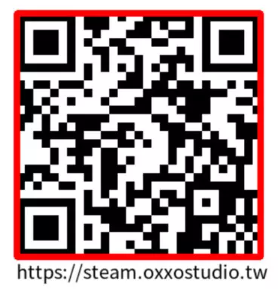

In [ ]:
import cv2
import numpy as np
from PIL import ImageFont, ImageDraw, Image          # 載入 PIL ( 為了放中文字 )
img = cv2.imread("QRcode.png")

qrcode = cv2.QRCodeDetector()
data, bbox, rectified = qrcode.detectAndDecode(img)

# 建立放入文字的函式
def putText(x,y,text,color=(0,0,0)):
    global img
    fontpath = 'NotoSansTC-Regular.ttf'      # 字體 ( 從 Google Font 下載 )
    font = ImageFont.truetype(fontpath, 20)  # 設定字型與大小
    imgPil = Image.fromarray(img)            # 將 img 轉換成 PIL 圖片物件
    draw = ImageDraw.Draw(imgPil)            # 建立繪圖物件
    draw.text((x, y), text, fill=color, font=font)  # 寫入文字
    img = np.array(imgPil)                   # 轉換回 np array

def boxSize(arr):
    global data
    box_roll = np.rollaxis(arr,1,0)
    xmax = int(np.amax(box_roll[0]))
    xmin = int(np.amin(box_roll[0]))
    ymax = int(np.amax(box_roll[1]))
    ymin = int(np.amin(box_roll[1]))
    return (xmin,ymin,xmax,ymax)

if bbox is not None:
    print(data)
    print(bbox)
    print(rectified)
    box = boxSize(bbox[0])
    cv2.rectangle(img,(box[0],box[1]),(box[2],box[3]),(0,0,255),5)
    # 在 QR Code 下方加入文字
    putText(box[0], box[3] + 10, data, color=(0, 0, 255))

cv2.imshow('oxxostudio', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

##### 辨識多組 QRCode 
如果影像中有「多組」QRcode 需要辨識，則需要改用 detectAndDecodeMulti() 方法進行偵測，detectAndDecodeMulti() 方法會回傳四個數值：

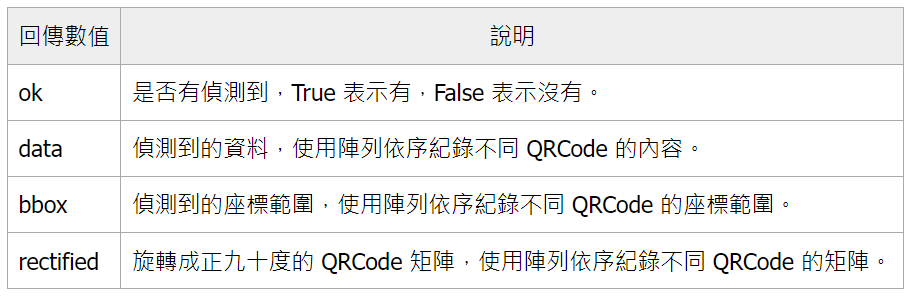

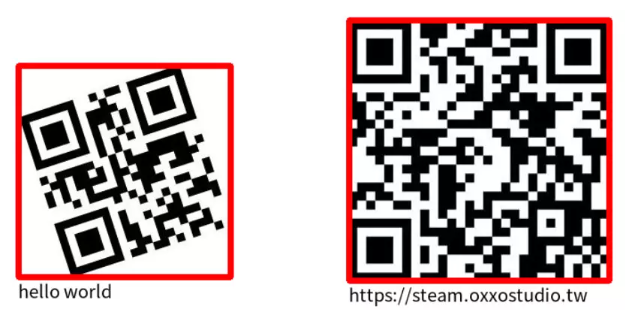

In [ ]:
# 額外內容，合併兩張圖片，符合這章節的主題。

import cv2
import numpy as np

# 讀取圖片
img1 = cv2.imread(r"C:\Users\cgiks\Desktop\qrcode_today-obs.line-scdn.net.png")
img2 = cv2.imread(r"C:\Users\cgiks\Desktop\qrcode_s.yimg.com.png")

# 調整圖片大小，使它們具有相同的高度
height = min(img1.shape[0], img2.shape[0])
img1 = cv2.resize(img1, (int(img1.shape[1] * height / img1.shape[0]), height))
img2 = cv2.resize(img2, (int(img2.shape[1] * height / img2.shape[0]), height))

# 合併兩張圖片
img = np.hstack((img1, img2))

# 顯示並儲存合併後的圖片
cv2.imshow('oxxostudio', img)
cv2.imwrite('QRcode_2.png', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import cv2
from pyzbar import pyzbar

# 讀取影像
image = cv2.imread('QRcode_2.png')

# 偵測並解碼 QRCode
qrcodes = pyzbar.decode(image)

# 繪製邊界並顯示解碼結果
for qrcode in qrcodes:
    (x, y, w, h) = qrcode.rect
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)
    
    qrcode_data = qrcode.data.decode('utf-8')
    qrcode_type = qrcode.type
    
    text = f'{qrcode_data} ({qrcode_type})'
    cv2.putText(image, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0, 0, 255), 1)

    # 列印輸出 QRCode 網址
    print(f'Detected QRCode: {qrcode_data}')

# 顯示影像
cv2.imshow('Image', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

##### 辨識 BarCode 
OpenCV 開啟圖片後，使用 BarcodeDetector() 建立 QRCode 偵測器，\
接著就能使用 barcode_BarcodeDetector() 方法開始偵測圖片中的 BarCode\
( 可以同時偵測多組 BarCode )，偵測 BarCode 之後會回傳四個數值：

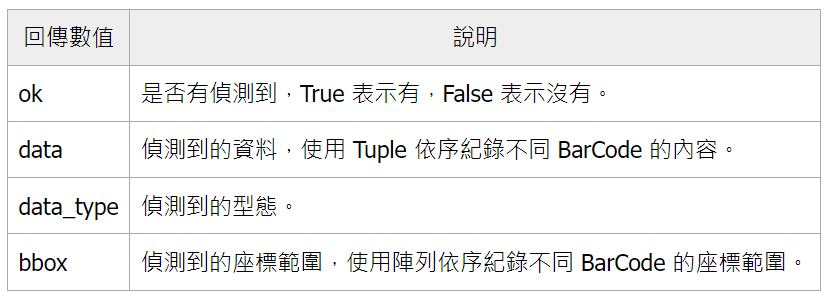

下方的程式碼延伸前面辨識 QRCode 的 putText 和 boxSize 函式，同時偵測畫面中的兩個 BarCode，偵測到 BarCode 後會使用紅色框標記並顯示內容。

* 注意，BarCode 圖片的上下左右需要保持一定距離，不然發生偵測不到的狀況

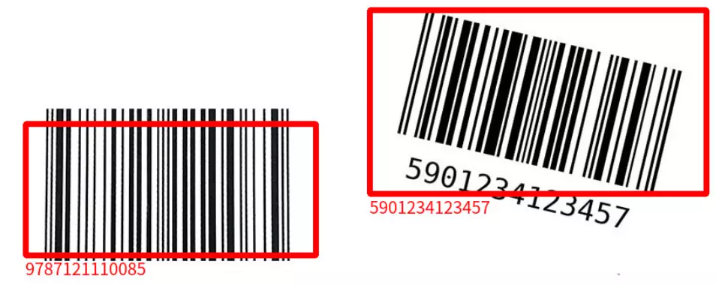

In [ ]:
import cv2
from pyzbar import pyzbar

# 讀取影像
image = cv2.imread('barcode.jpg')

# 偵測並解碼 BarCode
barcodes = pyzbar.decode(image)

# 繪製邊界並顯示解碼結果
for barcode in barcodes:
    (x, y, w, h) = barcode.rect
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)
    
    barcode_data = barcode.data.decode('utf-8')
    barcode_type = barcode.type
    
    text = f'{barcode_data} ({barcode_type})'
    cv2.putText(image, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
    
    # 列印輸出 BarCode 內容
    print(f'Detected BarCode: {barcode_data}')

# 顯示影像
cv2.imshow('Image', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

##### 即時影像辨識 QRCode 
參考「[讀取並播放影片](https://steam.oxxostudio.tw/category/python/ai/opencv-read-video.html)」文章，將讀取攝影鏡頭影像的範例，\
結合辨識 QRCode 的範例，就能即時透過攝影機，偵測並辨識 QRCode。

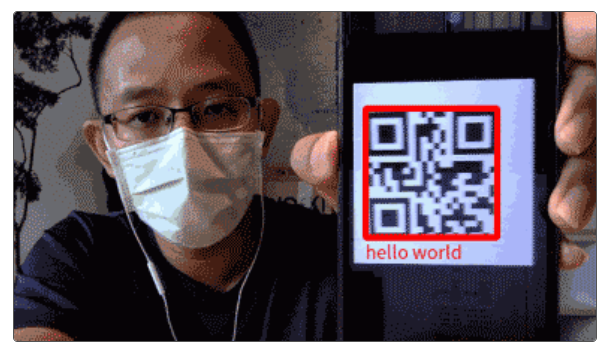

In [ ]:
import cv2
import numpy as np
from PIL import ImageFont, ImageDraw, Image

# 開啟攝影機
cap = cv2.VideoCapture(0)

# 定義顯示文字的函式
def putText(x, y, text, color=(0,0,0)):
    global img
    fontpath = 'NotoSansTC-Regular.ttf'  # 字體檔案路徑
    font = ImageFont.truetype(fontpath, 20)  # 設定字體和大小
    imgPil = Image.fromarray(img)  # 將 OpenCV 圖片轉換為 PIL 圖片
    draw = ImageDraw.Draw(imgPil)  # 建立繪圖物件
    draw.text((x, y), text, fill=color, font=font)  # 在圖片上繪製文字
    img = np.array(imgPil)  # 將 PIL 圖片轉換回 OpenCV 圖片

# 計算 QRCode 外框的大小
def boxSize(arr):
    global data
    box_roll = np.rollaxis(arr, 1, 0)  # 轉換座標軸
    xmax = int(np.amax(box_roll[0]))  # 計算 x 最大值
    xmin = int(np.amin(box_roll[0]))  # 計算 x 最小值
    ymax = int(np.amax(box_roll[1]))  # 計算 y 最大值
    ymin = int(np.amin(box_roll[1]))  # 計算 y 最小值
    return (xmin, ymin, xmax, ymax)  # 返回外框座標

# 建立 QRCode 偵測器
qrcode = cv2.QRCodeDetector()

while True:
    ret, frame = cap.read()  # 讀取攝影機畫面
    if not ret:
        print("Cannot receive frame")  # 如果無法讀取畫面，則跳出迴圈
        break
    img = cv2.resize(frame, (720, 420))  # 縮小尺寸，加快速度
    ok, data, bbox, rectified = qrcode.detectAndDecodeMulti(img)  # 辨識 QRCode
    if ok:
        for i in range(len(data)):
            text = data[i]  # QRCode 內容
            box = boxSize(bbox[i])  # QRCode 座標
            cv2.rectangle(img, (box[0], box[1]), (box[2], box[3]), (0, 0, 255), 5)  # 繪製外框
            putText(box[0], box[3], text, color=(0, 0, 255))  # 顯示文字
    cv2.imshow('oxxostudio', img)  # 顯示影像
    if cv2.waitKey(1) == ord('q'):  # 按下 'q' 鍵退出
        break

# 釋放攝影機資源並關閉所有視窗
cap.release()
cv2.destroyAllWindows()